In [1]:
# --- Imports ---
import datetime as dt
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from scipy import stats
from pylab import *
from sklearn.neighbors import KernelDensity
%matplotlib inline

C:\Users\Ryan\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Intro

Let's do an analysis of the NBA draft. Most questions start over a round of beers and this is no different. During game 5 of the 2014-2015 NBA finals my friends and I got into a typical sports arguemnt; who is the best and why? I had been arguing that Lebron James' performance in these finals was historically good but my friends disagreed. Forcefully. As these discussions flow and ebb we got into the style of professional basketball itself and somehow, eventually, what makes a good draft? Let's take a look using data from basketball-reference.com. 

The first type of rating is the BR rating....

Star -- 20+ rating

Solid -- 15 to 19.9

Role Player -- 10 to14.9

Deep Bench -- 5 to 9.9

Complete Bust -- less than 5

DNP -- (never played in the NBA)

In [7]:
# This function computes a drafts BR rating and returns a dictionary
# with the name as the key and Br as the value
def draft_analysis(file):
    draft_dict=OrderedDict()
    infile = open(file, 'r') # CSV file
    import csv
    table = []
    table = [row for row in csv.reader(infile)]

    #Fill all empty values with 0.0
    for row in range(1,len(table)):
        for column in range(1,len(table[0])):
            if table[row][column] == '':
                table[row][column] = 0.0

    for row in range(1,len(table)):
        total = 0.0
        for column in range(8,11):
            total += float(table[row][column])
        # This will be the Rating = points/game + rebounds/game + assists/game
        # B-R rating??? 538 used it
        if total != 0:
            draft_dict[table[row][3]] = total/float(table[row][6])
        else:
            draft_dict[table[row][3]] = 0.0
    # Add to the list of drafts
    yearly.append(draft_dict)

In [8]:
from glob import glob
from collections import OrderedDict
# Return everything in local folder with *.csv.
draft_list = glob('*.csv')
# Make list that will have dictionary with every darft year
# Dictionary will be name with BR rating in same order as draft
yearly = []
for draft in draft_list:
    draft_analysis(draft)

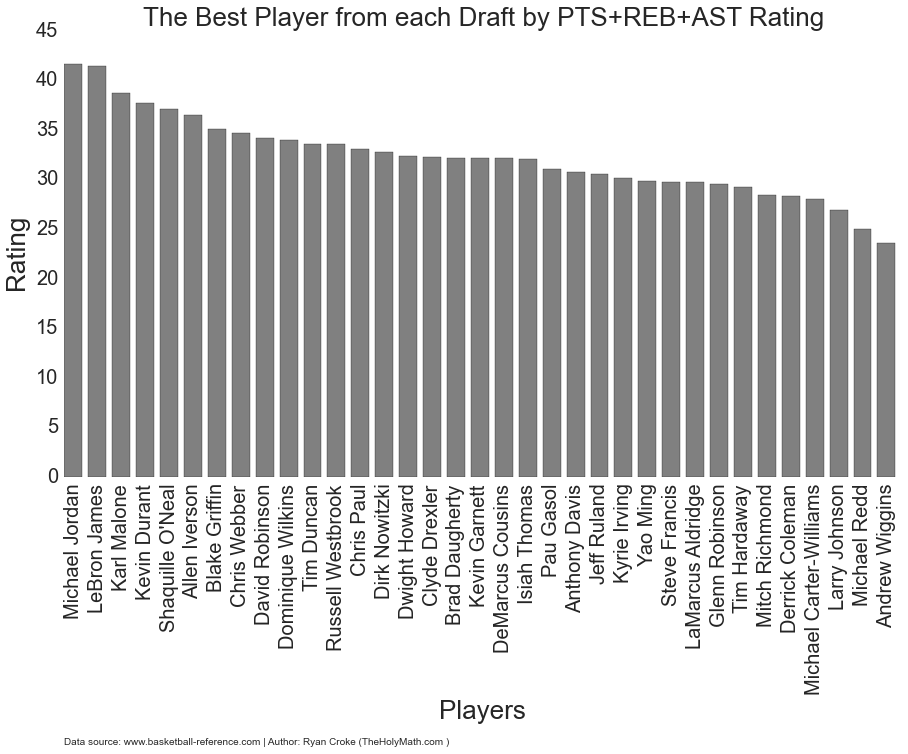

In [9]:
# Find max ranking ever
max_year=OrderedDict()

for i in xrange(len(yearly)):
    max_year[max(yearly[i].iterkeys(), key=lambda k: yearly[i][k])] = max(yearly[i].values())

# This sorts the list by value and then we rearrange it from biggest to smallest
from operator import itemgetter
dic = sorted(max_year.items(), key=itemgetter(1))
dic = dic[::-1]

# Plot this mother...
plt.figure(figsize=(15, 8), dpi=80)
#ind = [x for x in xrange(0,35)]  # the x locations for the groups
N = len(dic) # number of days
ind = np.arange(N)  # the x locations for the groups
playerval = []
players =[]
for vals in xrange(len(dic)):
    playerval.append(dic[vals][1])
for vals in xrange(len(dic)):
    players.append(dic[vals][0])
width = 0.75       # the width of the bars
plt.xlabel("Players", fontsize=26)  
plt.ylabel("Rating", fontsize=26) 
# Let's plot some results
plt.bar(xrange(len(playerval)),playerval,width,color='grey')
plt.xticks(ind+.375,players,rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
plt.title("The Best Player from each Draft by PTS+REB+AST Rating", fontsize=26)
text(0, -27, "Data source: www.basketball-reference.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10)
plt.savefig('Best_Player_per_draft.png', bbox_inches='tight')
plt.show()



# Graphing

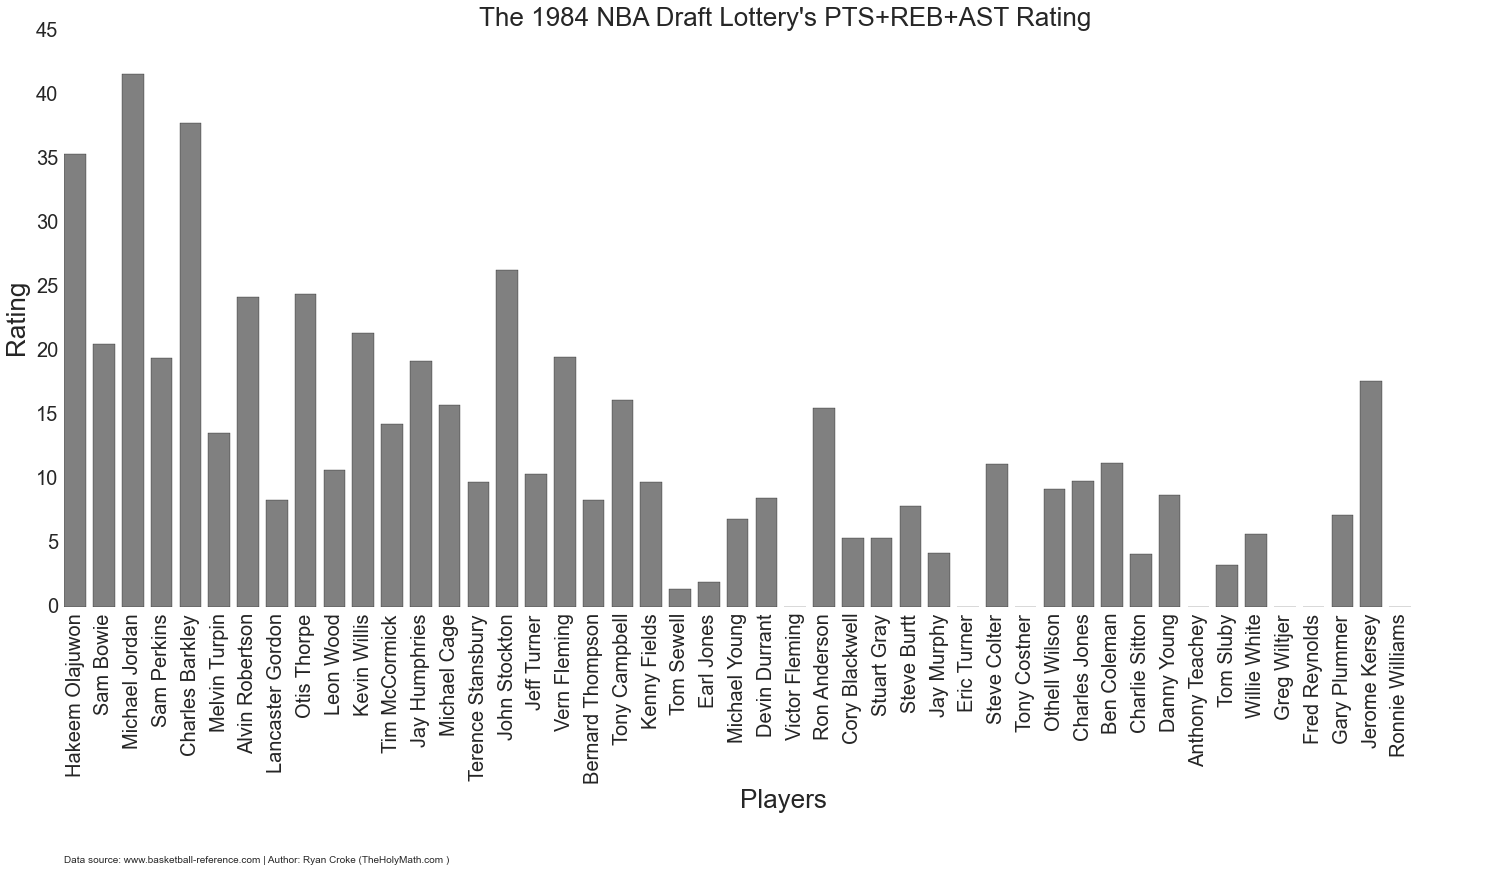

In [16]:
# Plot this mother...
fig = plt.figure(figsize=(20, 8), dpi=80)
ax = fig.add_axes([0,0,1,1])
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
#for key, value in my_dictionary.items():
#    print(key, value)
N = len(yearly[4]) # number of days
ind = np.arange(N)  # the x locations for the groups
width = 0.75       # the width of the bars
plt.xlabel("Players", fontsize=26)  
plt.ylabel("Rating", fontsize=26) 
# Let's plot some results
fig = matplotlib.pyplot.gcf()
#plt.bar(range(len(counter)), counter.values(), align='center')
plt.bar(ind, yearly[4].values(), width,color='grey')
#plot(xrange(3))
#plt.xticks(range(len(counter)), counter.keys())
plt.xticks(ind+width/2, yearly[4].keys(),rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
#ax.set_xticks(ind+width)
plt.title("The 1984 NBA Draft Lottery's PTS+REB+AST Rating", fontsize=26)
text(0, -20, "Data source: www.basketball-reference.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10) 
plt.savefig('1984_BR_rating.png', bbox_inches='tight')
plt.show()


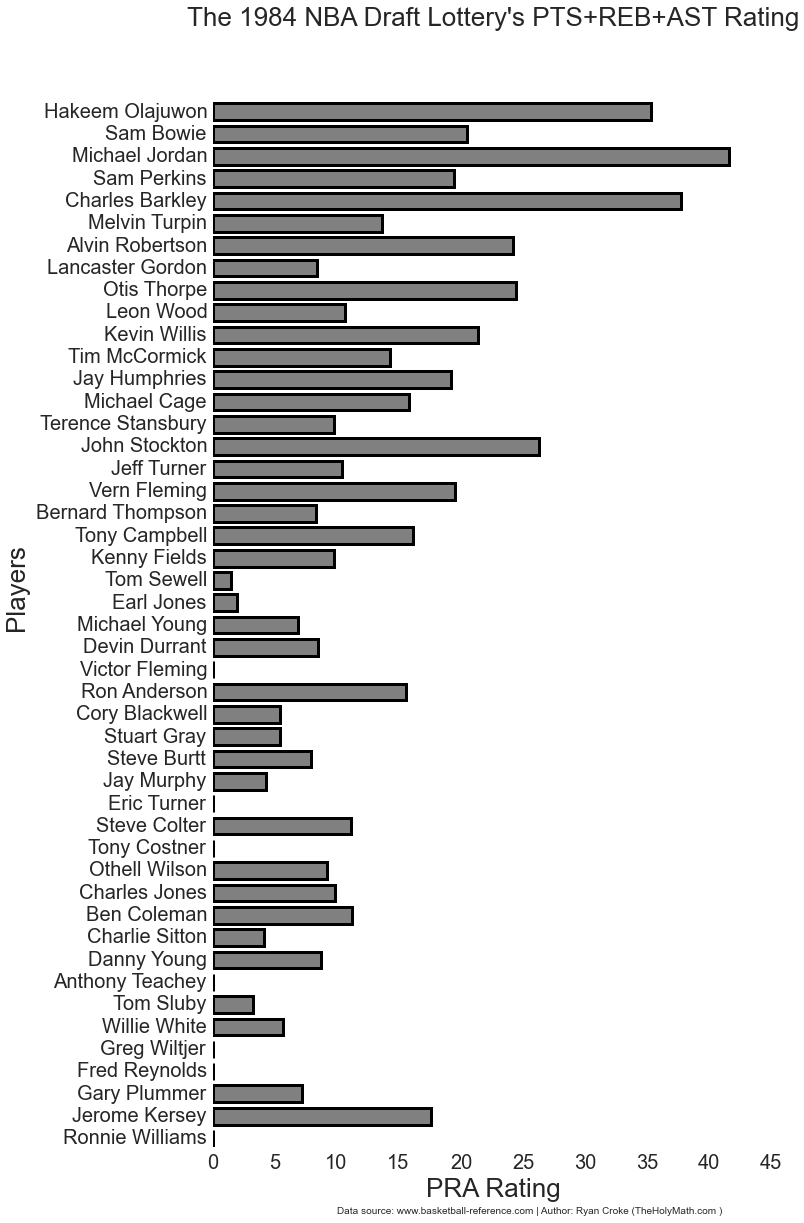

In [46]:
# Same as above but vertical
fig = plt.figure(figsize=(10, 20), dpi=80)
#ax = fig.add_axes([0,0,1,1])
#ax.get_xaxis().tick_bottom()  
#ax.get_yaxis().tick_left() 
#for key, value in my_dictionary.items():
#    print(key, value)
N = len(yearly[4]) # number of days
ind = np.arange(N)  # the y locations for the groups
width = 0.75       # the width of the bars
plt.ylabel("Players", fontsize=26)  
plt.xlabel("PRA Rating", fontsize=26) 
backwards = yearly[4].values()
namesback = yearly[4].keys()
# Let's plot some results
#fig = matplotlib.pyplot.gcf()
#plt.bar(range(len(counter)), counter.values(), align='center')
barh(ind,backwards[::-1],width,color='grey',linewidth=3)
#plt.bar(ind, yearly[4].values(), width,color='grey')
#plot(xrange(3))
#plt.xticks(range(len(counter)), counter.keys())
plt.yticks(ind+width/2, namesback[::-1],rotation='horizontal',fontsize=20)
plt.xticks(fontsize=20)
#ax.set_xticks(ind+width)
plt.title("The 1984 NBA Draft Lottery's PTS+REB+AST Rating", fontsize=26)
text(10, -3, "Data source: www.basketball-reference.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10) 
plt.savefig('1984_BR_ratingV.png', bbox_inches='tight')
plt.show()

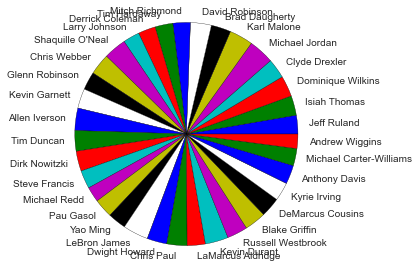

In [314]:
from pylab import *
pie(max_year.values(), labels=max_year.keys())
axis('equal')
#title('2000 NBA Draft BR Ratings')
show()

In [346]:
# Matrix with len(yearly) rows and 6 entries each year for type of player
# This compures the BR for all years
matrix = [[0]*6 for i in range(len(yearly))]
for count in xrange(len(yearly)):
    #print yearly[count].values()
    for val in yearly[count].values():
        if val >= 20:
            matrix[count][0] += 1
        if val >= 15 and val < 20:
            matrix[count][1] +=1
        if val >= 10 and val < 15:
            matrix[count][2] +=1
        if val >= 5 and val < 10:
            matrix[count][3] += 1
        if val > 0 and val < 5:
            matrix[count][4] +=1
        if val ==0:
            matrix[count][5] +=1

In [347]:
years = [x for x in xrange(1980,2015)]
print len(years)
N = len(yearly) # number of years
ind = np.arange(N) + 0.5

35


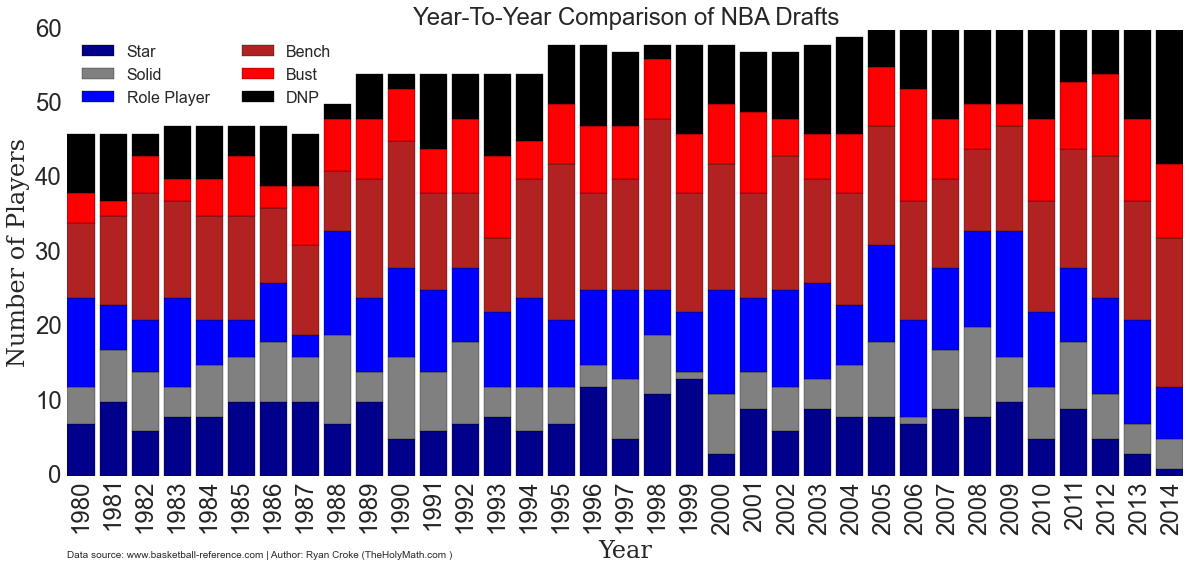

In [350]:
plt.figure(figsize=(20, 8), dpi=80)
#for key, value in my_dictionary.items():
#    print(key, value)
N = len(yearly) # number of years
ind = np.arange(N) + 0.5  # the x locations for the groups

axis_font = {'fontname':'Serif', 'size':'24'}
plt.xlabel("Year",**axis_font)
plt.ylabel("Number of Players", **axis_font)
years = [x for x in xrange(1980,2015)]
plt.xticks(ind,years,fontsize = 24,rotation='vertical')
plt.yticks(fontsize = 24)
#plt.bar(range(0,len(rating)),rating,1)

width = 0.85
for i in xrange(len(yearly)):
    p1 = plt.bar(i, matrix[i][0], width, color='darkblue')
    p2 = plt.bar(i, matrix[i][1], width, color='grey', bottom=matrix[i][0])
    p3 = plt.bar(i, matrix[i][2], width, color='blue', bottom=(matrix[i][1]+matrix[i][0]))
    p4 = plt.bar(i, matrix[i][3], width, color='firebrick', bottom=(matrix[i][1]+matrix[i][0]+matrix[i][2]))
    p5 = plt.bar(i, matrix[i][4], width, color='red', bottom=(matrix[i][1]+matrix[i][0]+matrix[i][2] + matrix[i][3]))
    p6 = plt.bar(i, matrix[i][5], width, color='black', bottom=(matrix[i][1]+matrix[i][0]+matrix[i][2] + matrix[i][3]+matrix[i][4]))
plt.legend([p1, p2,p3,p4,p5,p6],['Star', 'Solid','Role Player','Bench','Bust','DNP'],loc='best',ncol=2,prop={'size':16})
plt.title('Year-To-Year Comparison of NBA Drafts',fontsize=24)
text(0, -11, "Data source: www.basketball-reference.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10)
plt.savefig('year_to_year_NBA_Draft.png', bbox_inches='tight')

# Same graph with data as a percentage

In [351]:
for i in xrange(len(matrix)):
    divisor = float(sum(matrix[i]))
    for count in xrange(0,6):
        matrix[i][count] = matrix[i][count]/divisor

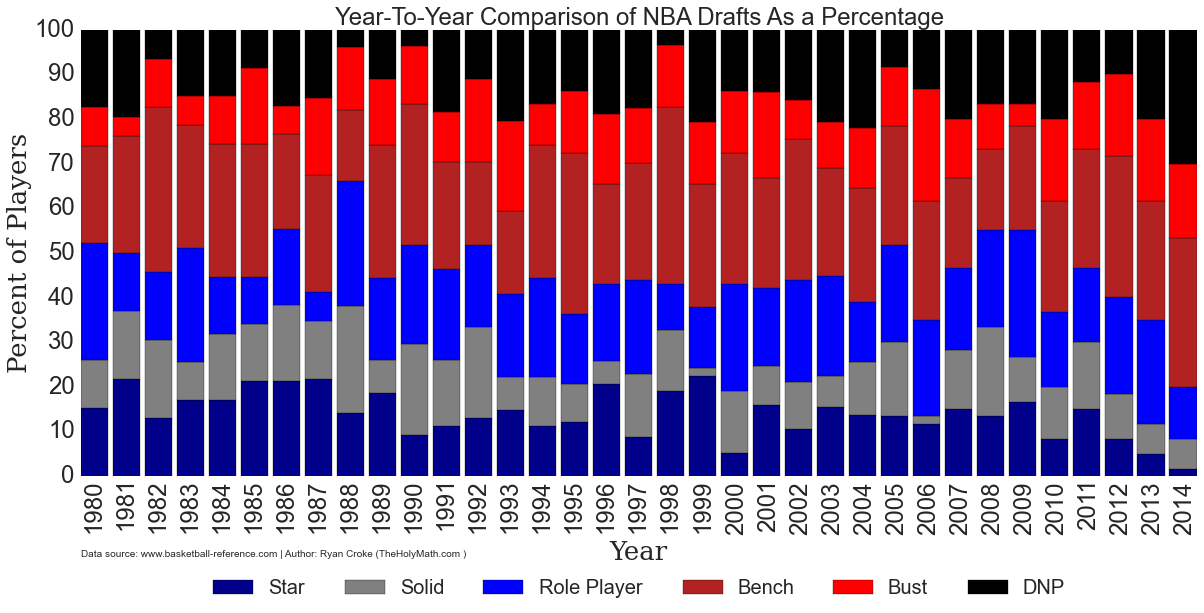

In [359]:
# https://plot.ly/python/bar-charts/ .... Last example is cool
plt.figure(figsize=(20, 8), dpi=80)
#for key, value in my_dictionary.items():
#    print(key, value)
N = len(yearly) # number of years
ind = np.arange(N) +0.5 # the x locations for the groups
per = range(111)
per = per[0::10]
indy = np.arange(N)/10.0
axis_font = {'fontname':'Serif', 'size':'26'}
plt.xlabel("Year",**axis_font)
plt.ylabel("Percent of Players", **axis_font)
years = [x for x in xrange(1980,2015)]
plt.xticks(ind,years,fontsize = 24,rotation='vertical')
plt.yticks(indy,per,fontsize = 24)
#plt.bar(range(0,len(rating)),rating,1)

width = 0.85
for i in xrange(len(yearly)):
    p1 = plt.bar(i, matrix[i][0], width, color='darkblue')
    p2 = plt.bar(i, matrix[i][1], width, color='grey', bottom=matrix[i][0])
    p3 = plt.bar(i, matrix[i][2], width, color='blue', bottom=(matrix[i][1]+matrix[i][0]))
    p4 = plt.bar(i, matrix[i][3], width, color='firebrick', bottom=(matrix[i][1]+matrix[i][0]+matrix[i][2]))
    p5 = plt.bar(i, matrix[i][4], width, color='red', bottom=(matrix[i][1]+matrix[i][0]+matrix[i][2] + matrix[i][3]))
    p6 = plt.bar(i, matrix[i][5], width, color='black', bottom=(matrix[i][1]+matrix[i][0]+matrix[i][2] + matrix[i][3]+matrix[i][4]))
plt.legend([p1, p2,p3,p4,p5,p6],['Star', 'Solid','Role Player','Bench','Bust','DNP'],loc='upper center', bbox_to_anchor=(0.5, -0.19),
          fancybox=True, shadow=True, ncol=6,prop={'size':20})
plt.title('Year-To-Year Comparison of NBA Drafts As a Percentage',fontsize=24)
text(0, -0.18, "Data source: www.basketball-reference.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10)
plt.savefig('year_to_year_NBA_Draft_Percent.png', bbox_inches='tight')

# DOG Vs. ANT

In [372]:
# This function computes a drafts BR rating and returns a dictionary
# with the name as the key and Br as the value
def dog_analysis(file):
    player = []
    infile = open(file, 'r') # CSV file
    import csv
    table = []
    table = [row for row in csv.reader(infile)]

    #Fill all empty values with 0.0
    for row in range(1,len(table)):
        for column in range(1,len(table[0])):
            if table[row][column] == '':
                table[row][column] = 0.0

    for row in range(1,len(table)):
        total = 0.0
        for column in range(6,9):
            total += float(table[row][column])
        # This will be the Rating = points/game + rebounds/game + assists/game
        # B-R rating??? 538 used it
        player.append(total)
    # Add to the list of drafts
    yearbyyear.append(player)

In [426]:
# Return everything in local folder with *.csv.
dog_list = glob('Dog\*PRA.csv')
# Make list that will have dictionary with Dog v. Antawn
# Dictionary will be name with BR rating in same order as draft
yearbyyear = []
for draft in dog_list:
    print draft
    dog_analysis(draft)
print yearbyyear
print sum(yearbyyear[0]) / float(len(yearbyyear[0]))
print sum(yearbyyear[1]) / float(len(yearbyyear[1]))

Dog\ANT_PRA.csv
Dog\DOG_PRA.csv
[[16.7, 30.0, 35.599999999999994, 28.5, 31.1, 22.0, 29.5, 31.700000000000003, 29.700000000000003, 33.099999999999994, 33.0, 28.4, 30.6, 24.8, 26.4, 25.5, 14.9, 6.6], [30.799999999999997, 29.9, 30.5, 31.7, 26.4, 29.299999999999997, 32.2, 29.4, 30.4, 22.5, 13.6]]
26.5611111111
27.8818181818


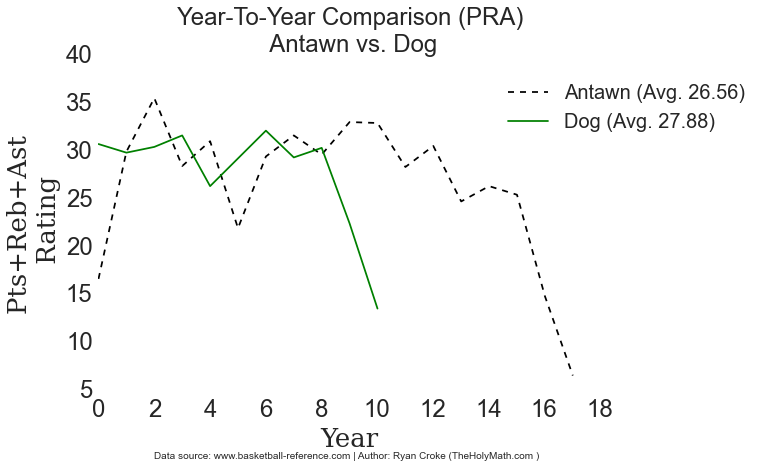

In [481]:
plt.figure(figsize=(9,6), dpi=80)
plot(xrange(len(yearbyyear[0])),yearbyyear[0],'--',color='black')
plot(xrange(len(yearbyyear[1])),yearbyyear[1],color='green')
plt.legend(['Antawn (Avg. 26.56)','Dog (Avg. 27.88)'],loc=(0.8,0.75),prop={'size':20})
axis_font = {'fontname':'Serif', 'size':'26'}
#plt.plot((0, 17), (26.56, 26.56), 'k--')
#plt.plot((0, 10), (27.88, 27.88), 'g-')
plt.xlabel("Year",**axis_font)
plt.ylabel("Pts+Reb+Ast \n Rating", **axis_font)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.title('Year-To-Year Comparison (PRA) \n Antawn vs. Dog',fontsize=24)
plt.text(2, -2, "Data source: www.basketball-reference.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10)
#plt.text(17.4, 26.5, "Antawn PRA average = 26.56", fontsize=20)
#plt.text(17.4, 28.5, "Dog PRA average = 27.88", fontsize=20)
plt.savefig('DogvsAnt_PRA.png', bbox_inches='tight')

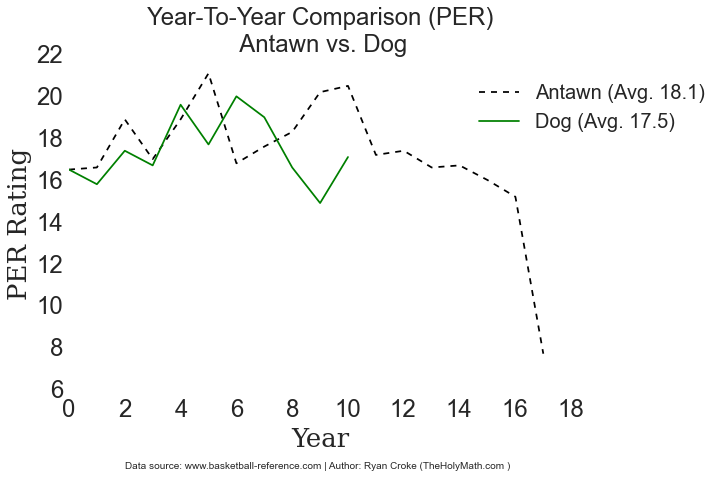

In [490]:
# PER
AntPER = [16.6,16.7,19,17.1,19,21.2,16.9,17.7,18.4,20.3,20.6,17.3,17.5,16.7,16.8,16.1,15.3,7.8]
DOGPER = [16.6,15.9,17.5,16.8,19.7,17.8,20.1,19.1,16.7,15,17.2]
plt.figure(figsize=(9,6), dpi=80)
plot(xrange(len(AntPER)),AntPER,'--',color='black')
plot(xrange(len(DOGPER)),DOGPER,color='green')
plt.legend(['Antawn (Avg. 18.1)','Dog (Avg. 17.5)'],loc=(0.8,0.75),prop={'size':20})
axis_font = {'fontname':'Serif', 'size':'26'}
plt.xlabel("Year",**axis_font)
plt.ylabel("PER Rating", **axis_font)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.title('Year-To-Year Comparison (PER) \n Antawn vs. Dog',fontsize=24)
plt.text(2, 2.3, "Data source: www.basketball-reference.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10)
plt.savefig('DogvsAnt_PER.png', bbox_inches='tight')


In [5]:
filename = '2015_2016_stats.csv'
df = pd.read_csv(filename, na_values=['na'])

In [6]:
for keys in df.keys():
    print keys
    

1
Stephen Curry, GS
21
34.4
0.705
18.4
10.9
32.5
1.8
13.1
7.8
35.47
264
8.8
